In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA
#Построение датафрейма
### Your code is here
pca = PCA(n_components=2)

pca_dataset = pca.fit_transform(X)
pca_dataset = pd.DataFrame(data=pca_dataset, columns=['PCA_1', 'PCA_2'])

pca_dataset.head()

PCA_1      PCA_2
0 -38.743132 -23.282634
1 -13.209252 -25.023815
2  -2.004910  -1.637085
3  17.178458  -0.907657
4  14.477389 -11.656752

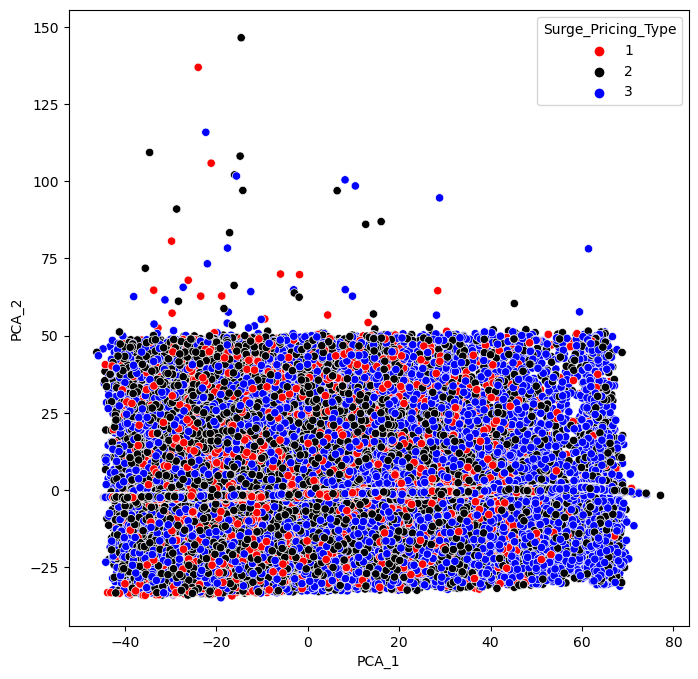

In [5]:
# Построение графика
fig = plt.figure()

fig.set_size_inches(8, 8)

sns.scatterplot(x=pca_dataset['PCA_1'], y=pca_dataset['PCA_2'],
                hue=y, palette=['red', 'black', 'blue'])

plt.show()

In [6]:
#Доля изначальной дисперисии содержащейся в комонентах
pca.explained_variance_ratio_.round(3)

array([0.632, 0.211])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [7]:
### Your code is here
corr_pca_1 = X.corrwith(pca_dataset['PCA_1'])
corr_pca_2 = X.corrwith(pca_dataset['PCA_2'])

corr_matrix = pd.concat((corr_pca_1, corr_pca_2), axis=1)

corr_matrix

0         1
Trip_Distance                  0.997767  0.018410
Customer_Since_Months          0.121591  0.003500
Life_Style_Index               0.480658 -0.025901
Customer_Rating               -0.070104 -0.003757
Cancellation_Last_1Month       0.000803  0.008960
Var1                          -0.048532  0.998600
Var2                           0.247178 -0.028448
Var3                           0.293819 -0.026583
Type_of_Cab_B                 -0.048751  0.005723
Type_of_Cab_C                 -0.012059 -0.003397
Type_of_Cab_D                  0.030079 -0.003183
Type_of_Cab_E                  0.069302  0.000254
Confidence_Life_Style_Index_B  0.227304  0.021109
Confidence_Life_Style_Index_C  0.057982 -0.004819
Destination_Type_B             0.027569  0.003273
Destination_Type_C            -0.010905 -0.006302
Destination_Type_D            -0.132203 -0.003049
Destination_Type_E            -0.070717 -0.003479
Destination_Type_F             0.008832 -0.005805
Destination_Type_G            -0.079850  0.000093
Destination_Type_H            -0.064851 -0.004513
Destination_Type_I            -0.067626 -0.002996
Destination_Type_J            -0.070659 -0.000492
Destination_Type_K            -0.033570  0.001483
Destination_Type_L             0.005635  0.003158
Destination_Type_M            -0.009987  0.000549
Destination_Type_N            -0.027875 -0.006745
Gender_Male                    0.002366  0.000670

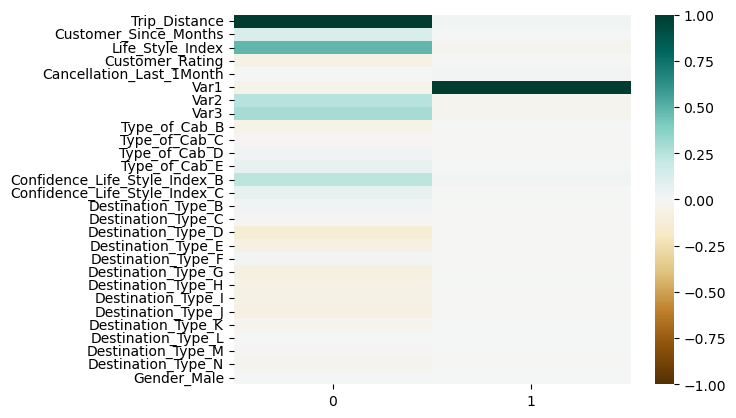

In [8]:
sns.heatmap(corr_matrix,
           xticklabels=corr_matrix.columns,
           yticklabels=corr_matrix.index,
           cmap='BrBG',
           vmin=-1,
           vmax=1);

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

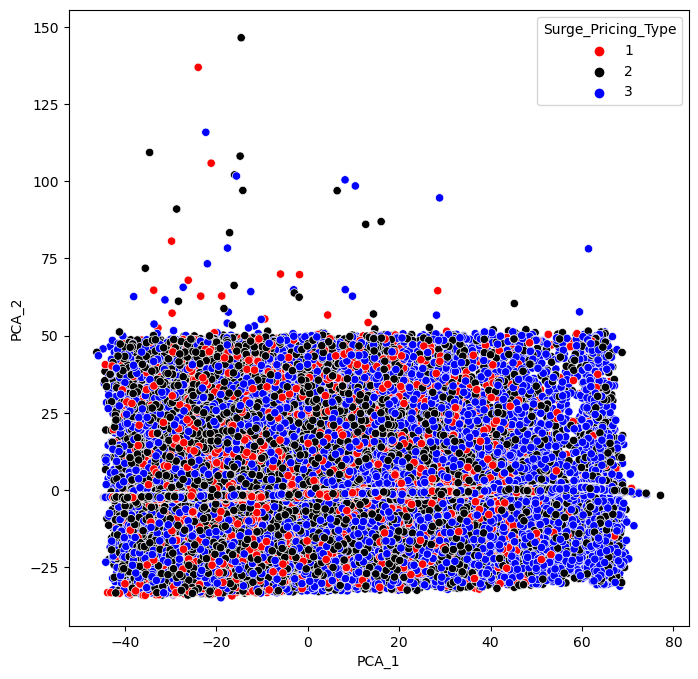

In [9]:
# Построение графика
fig = plt.figure()

fig.set_size_inches(8, 8)

sns.scatterplot(x=pca_dataset['PCA_1'], y=pca_dataset['PCA_2'],
                hue=y, palette=['red', 'black', 'blue'])

plt.show()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [10]:
### Your code is here
pca = PCA(n_components=3)

pca_3 = pca.fit_transform(X)
pca_3 = pd.DataFrame(data=pca_3, columns=['PCA_1', 'PCA_2', 'PCA_3'])

pca_3.head()




PCA_1      PCA_2      PCA_3
0 -38.743132 -23.282634 -11.303274
1 -13.209252 -25.023815   5.664106
2  -2.004910  -1.637085   3.663032
3  17.178458  -0.907657  -3.191676
4  14.477389 -11.656752  22.999348

In [11]:
corr_1 = X.corrwith(pca_3['PCA_1'])
corr_2 = X.corrwith(pca_3['PCA_2'])
corr_3 = X.corrwith(pca_3['PCA_3'])

corr_matrix_3d = pd.concat((corr_1,
                            corr_2,
                            corr_3), axis=1)
corr_matrix_3d

0         1         2
Trip_Distance                  0.997767  0.018410 -0.064176
Customer_Since_Months          0.121591  0.003500  0.081370
Life_Style_Index               0.480658 -0.025901  0.166688
Customer_Rating               -0.070104 -0.003757 -0.236793
Cancellation_Last_1Month       0.000803  0.008960  0.136222
Var1                          -0.048532  0.998600  0.021003
Var2                           0.247178 -0.028448  0.705159
Var3                           0.293819 -0.026583  0.951081
Type_of_Cab_B                 -0.048751  0.005723  0.011211
Type_of_Cab_C                 -0.012059 -0.003397 -0.008707
Type_of_Cab_D                  0.030079 -0.003183 -0.019453
Type_of_Cab_E                  0.069302  0.000254 -0.024079
Confidence_Life_Style_Index_B  0.227304  0.021109 -0.000882
Confidence_Life_Style_Index_C  0.057982 -0.004819 -0.008557
Destination_Type_B             0.027569  0.003273 -0.003024
Destination_Type_C            -0.010905 -0.006302  0.013828
Destination_Type_D            -0.132203 -0.003049 -0.016059
Destination_Type_E            -0.070717 -0.003479 -0.018844
Destination_Type_F             0.008832 -0.005805 -0.031646
Destination_Type_G            -0.079850  0.000093 -0.013557
Destination_Type_H            -0.064851 -0.004513  0.010386
Destination_Type_I            -0.067626 -0.002996 -0.006967
Destination_Type_J            -0.070659 -0.000492  0.003865
Destination_Type_K            -0.033570  0.001483 -0.019527
Destination_Type_L             0.005635  0.003158 -0.011154
Destination_Type_M            -0.009987  0.000549 -0.001850
Destination_Type_N            -0.027875 -0.006745 -0.008892
Gender_Male                    0.002366  0.000670  0.003067

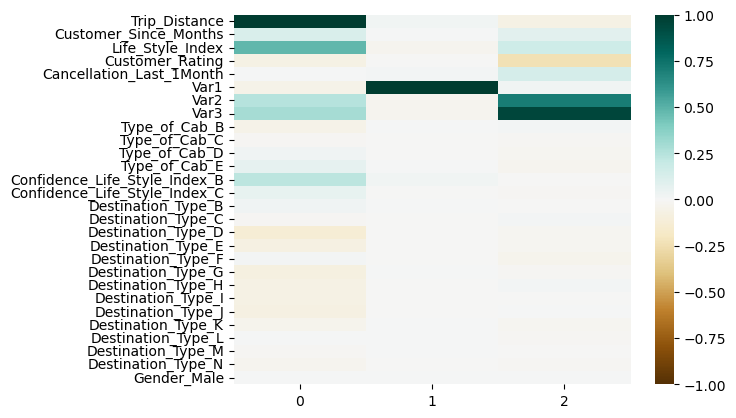

In [12]:
sns.heatmap(corr_matrix_3d,
           xticklabels=corr_matrix_3d.columns,
           yticklabels=corr_matrix_3d.index,
           cmap='BrBG',
           vmin=-1,
           vmax=1);

In [13]:
pca_3

PCA_1      PCA_2      PCA_3
0      -38.743132 -23.282634 -11.303274
1      -13.209252 -25.023815   5.664106
2       -2.004910  -1.637085   3.663032
3       17.178458  -0.907657  -3.191676
4       14.477389 -11.656752  22.999348
...           ...        ...        ...
131657 -32.267779  -2.482906   3.955203
131658  32.621206  -0.886322  11.438623
131659  -4.045367  -1.565545  -0.451941
131660   3.696395 -15.487904   3.655981
131661 -11.620976  38.849286  13.879220

[131662 rows x 3 columns]

In [14]:
pca_3 = pd.concat((pca_3, y), axis=1)

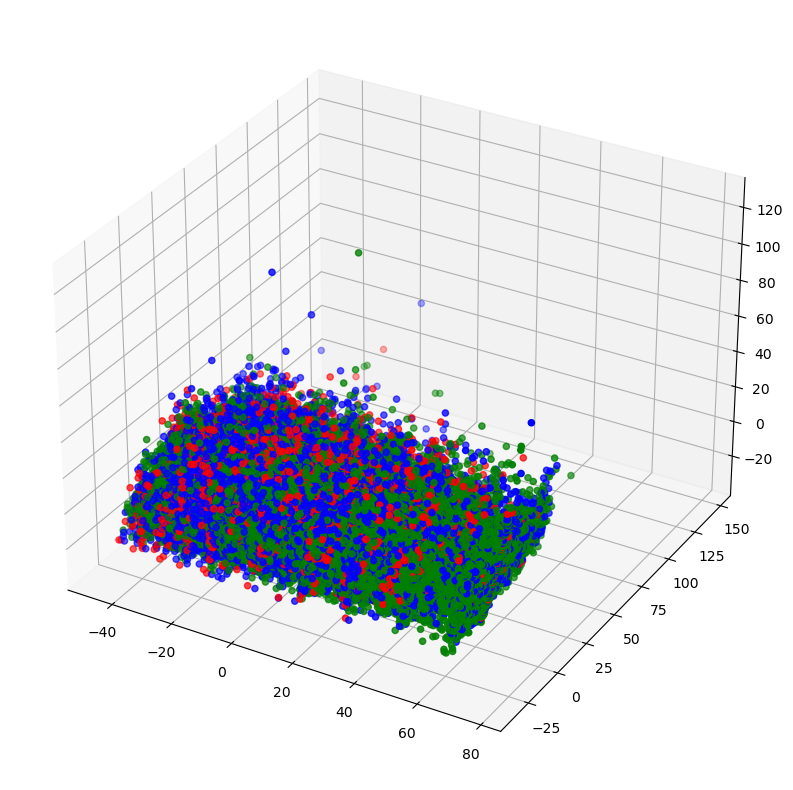

In [15]:
#Построение 3-х мерной прекции
fig = plt.figure()
fig.set_size_inches(10,10)

ax = plt.axes(projection='3d')

colors = pca_3['Surge_Pricing_Type'].replace([1, 2, 3],
                                             ['red', 'blue', 'green'])

ax.scatter3D(pca_3['PCA_1'],
             pca_3['PCA_2'],
             pca_3['PCA_3'],
             c=colors)
plt.show()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [16]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [18]:
#Построение пайплайна

pipe = Pipeline([('Scakler', StandardScaler()),
                ('PCA', PCA()),
                ('model', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('Scakler', StandardScaler()), ('PCA', PCA()),
                ('model', LogisticRegression())])

In [19]:
pipe_pca_0_result = pipe.predict(X_test)

In [20]:
print(classification_report(y_test, pipe_pca_0_result, digits=3))

              precision    recall  f1-score   support

           1      0.736     0.539     0.622      5372
           2      0.637     0.825     0.719     11349
           3      0.735     0.589     0.654      9612

    accuracy                          0.680     26333
   macro avg      0.702     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [21]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

search = GridSearchCV(pipe, param_grid,
                     cv=5, scoring='accuracy')

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scakler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [22]:
search.best_params_

{'model__C': 0.001, 'model__penalty': 'l2'}

In [23]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



In [24]:
pipe.set_params(PCA__n_components=2)

Pipeline(steps=[('Scakler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('model', LogisticRegression())])

In [25]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scakler', StandardScaler()),
                                       ('PCA', PCA(n_components=2)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [26]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [27]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [28]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    metrics = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = metrics[0]
    f1_score_dict[n_components] = metrics[1]
    ### Your code is here
    
    

CPU times: total: 4min 48s
Wall time: 2min 10s


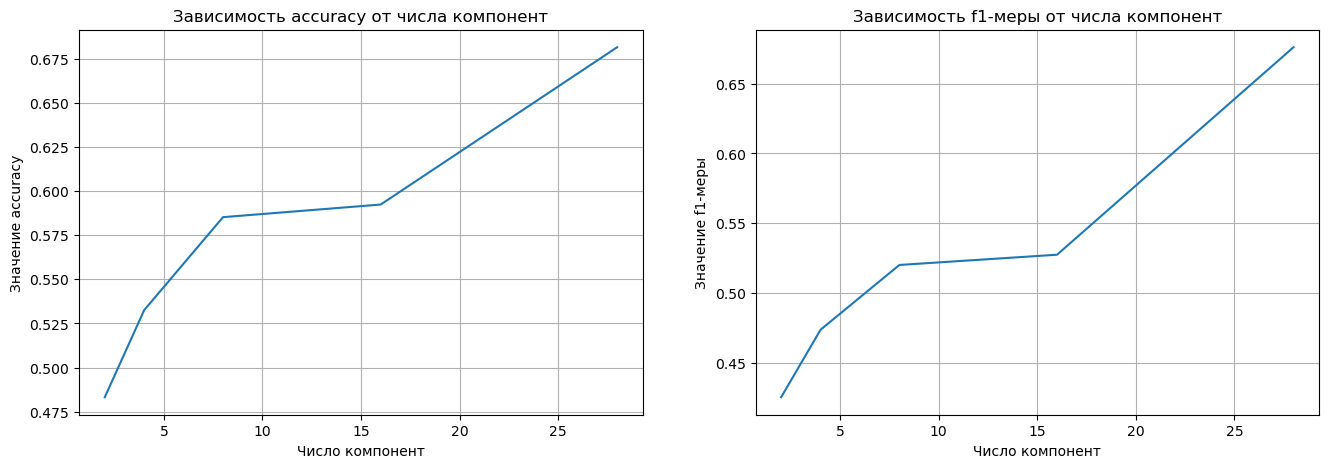

In [29]:
fig = plt.figure()
fig.set_size_inches(16, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(accuracy_dict.keys(), accuracy_dict.values())
plt.title("Зависимость accuracy от числа компонент")
plt.xlabel("Число компонент")
plt.ylabel("Значение accuracy")
plt.grid(True)

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(f1_score_dict.keys(), f1_score_dict.values())
plt.title("Зависимость f1-меры от числа компонент")
plt.xlabel("Число компонент")
plt.ylabel("Значение f1-меры")
plt.grid(True)


plt.show()



Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [30]:
from sklearn.manifold import TSNE

### Your code is here
X_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X), columns=['TSNE_1', 'TSNE_2'])


In [31]:
X_tsne

TSNE_1      TSNE_2
0      -60.041729 -102.068382
1       -6.210849  -93.814087
2        4.576790  -18.060085
3       49.347527    2.578933
4       31.654730  -53.729057
...           ...         ...
131657 -89.012810  -34.514530
131658  70.039085  -23.331181
131659  -7.107078    0.999431
131660  22.277056  -82.563255
131661  -4.215227   98.665001

[131662 rows x 2 columns]

<Axes: xlabel='TSNE_1', ylabel='TSNE_2'>

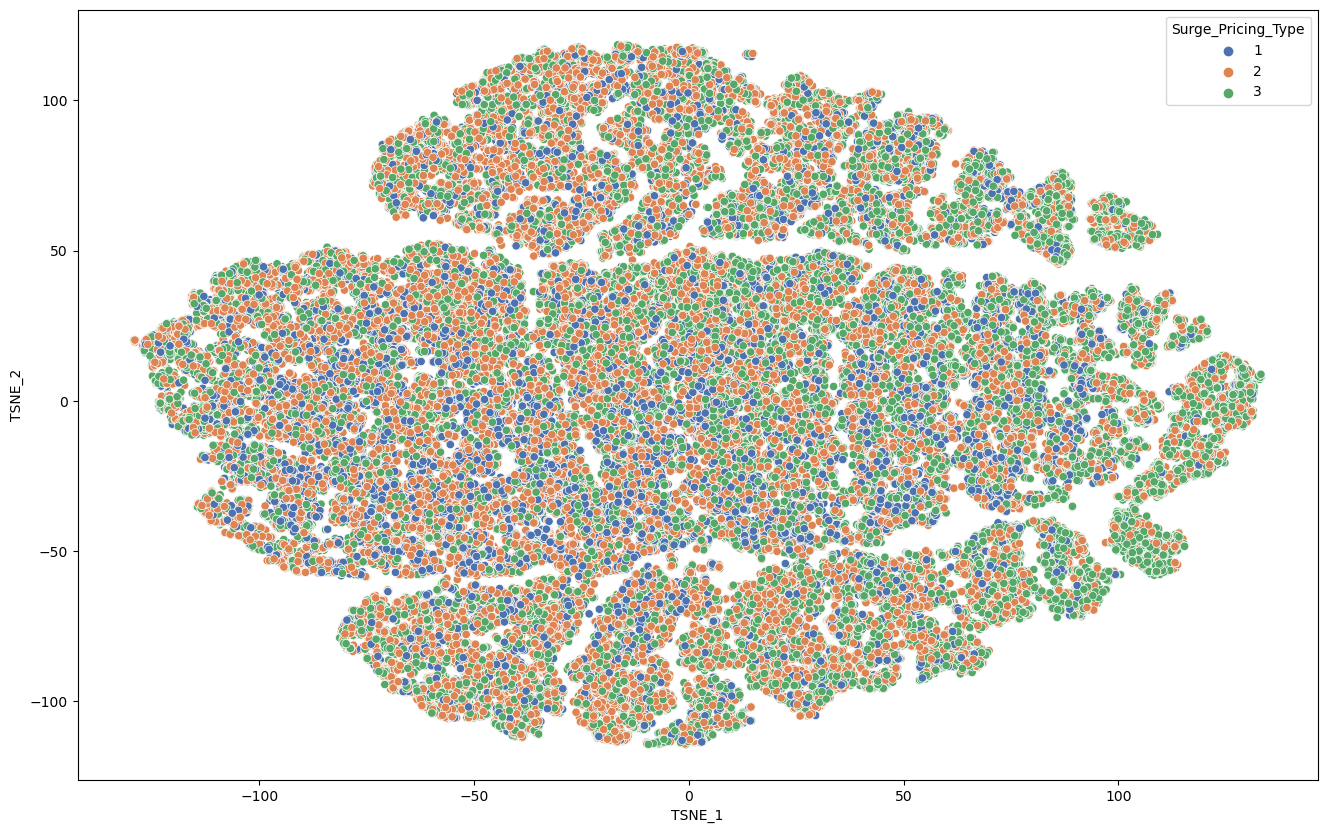

In [32]:
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x=X_tsne['TSNE_1'], 
                y=X_tsne['TSNE_2'], 
                hue=y, palette='deep')

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [33]:
### Your code is here
X_tsne = pd.DataFrame(TSNE(n_components=3).fit_transform(X), columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])
X_tsne


TSNE_1     TSNE_2     TSNE_3
0      -27.635939 -29.028505   8.166511
1      -10.130564 -26.417938   9.413634
2        0.485449  -8.848995  -4.517329
3       18.977528 -11.968951  -8.936278
4       10.462442 -15.167428  13.576275
...           ...        ...        ...
131657 -25.905411   5.185725   6.440267
131658  23.004461   4.422942   5.438067
131659  -2.118039 -14.730822  -6.938859
131660   6.410359 -25.422514  -0.569685
131661  -2.765213  29.655901  11.345938

[131662 rows x 3 columns]

In [34]:
X_tsne = pd.concat((X_tsne, y), axis=1)

In [35]:
X_tsne

TSNE_1     TSNE_2     TSNE_3  Surge_Pricing_Type
0      -27.635939 -29.028505   8.166511                   2
1      -10.130564 -26.417938   9.413634                   2
2        0.485449  -8.848995  -4.517329                   2
3       18.977528 -11.968951  -8.936278                   3
4       10.462442 -15.167428  13.576275                   2
...           ...        ...        ...                 ...
131657 -25.905411   5.185725   6.440267                   3
131658  23.004461   4.422942   5.438067                   2
131659  -2.118039 -14.730822  -6.938859                   2
131660   6.410359 -25.422514  -0.569685                   2
131661  -2.765213  29.655901  11.345938                   1

[131662 rows x 4 columns]

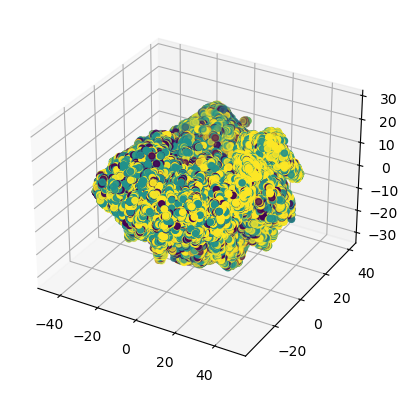

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_tsne['TSNE_1'],
             X_tsne['TSNE_2'],
             X_tsne['TSNE_3'],
             c=X_tsne['Surge_Pricing_Type'])

plt.show()

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!